In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import optuna

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import os 

DATA_PATH = f"{os.getcwd()}/data/Data_for_UCI_named.csv"

columns_names = [
    'tau1','tau2','tau3',
    'tau4','p1','p2','p3',
    'p4','g1','g2','g3','g4'
]
dtypes = {i:float for i in columns_names}

grid_df = pd.read_csv(DATA_PATH, dtype=dtypes)
grid_df = grid_df.drop(columns=["stab"])
grid_df["stabf"] = grid_df["stabf"].map({"unstable": 0, "stable": 1})

X, y = grid_df.drop(columns=["stabf"]), grid_df["stabf"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/home/ax-pedro-camara/miniconda3/envs/tcc/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
counts = y.value_counts()

In [24]:
counts[1] / counts[0]

np.float64(0.567398119122257)

In [28]:
3620 / (6380+3620)

0.362

In [26]:
counts[0]

np.int64(6380)

In [25]:
counts[1]

np.int64(3620)

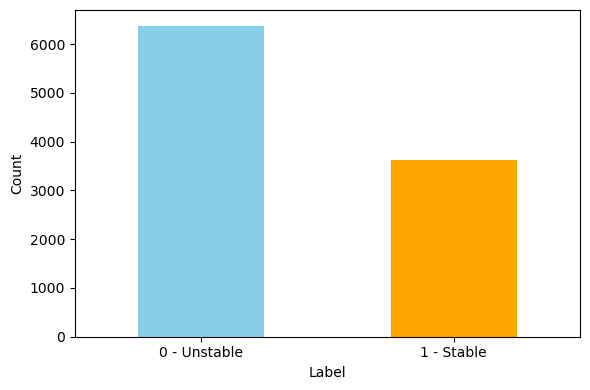

In [20]:
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['0 - Unstable', '1 - Stable'], rotation=0)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [33]:
def generate_train_val_plot(clf):
    val_loss = clf.validation_scores_
    train_loss = clf.loss_curve_
    
    plt.figure(figsize=(10, 6))
    plt.plot(val_loss, label='Validation - Acc')
    plt.plot(train_loss, label='Training - Loss')
    plt.xlabel('Epochs')
    #plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
def generate_confusion_matrix(clf, X_test, y_test, name: str):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")

In [10]:
def train_with_cross_val(clf, X, y, cv=5):
    metrics = ["accuracy", "f1", "precision", "recall"]
    scores = {}
    for metric in metrics:
        scores[metric] = cross_val_score(clf, X, y, cv=5, scoring=metric)
    
    return scores

In [5]:
# svc = make_pipeline(
#     StandardScaler(),
#     SVC(kernel='rbf', C=1.0, gamma='auto')
# )

svc = SVC(kernel='rbf', C=1.0, gamma='auto')

mlp = MLPClassifier(
    hidden_layer_sizes=(10, 20, 25),
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=15
)

In [6]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 20, 25),
              n_iter_no_change=15)

In [7]:
scores_mlp = train_with_cross_val(mlp, X, y)
scores_svc = train_with_cross_val(svc, X, y)

mlp.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(gamma='auto')

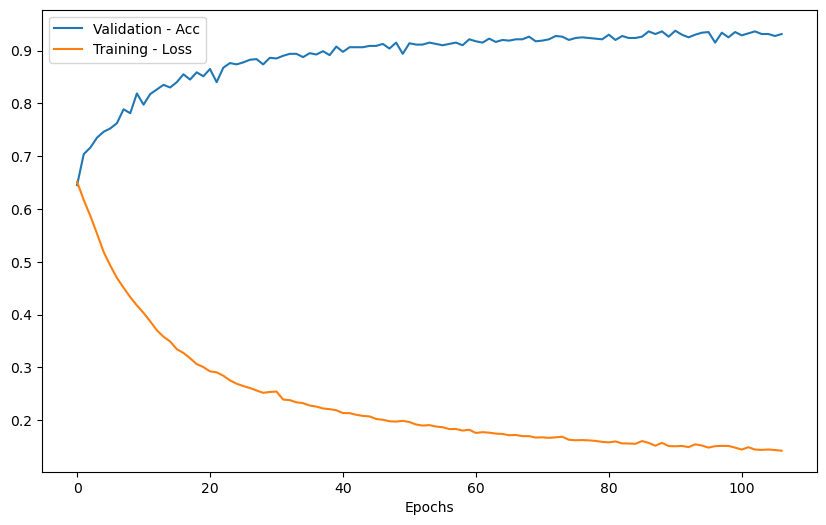

In [34]:
generate_train_val_plot(mlp)

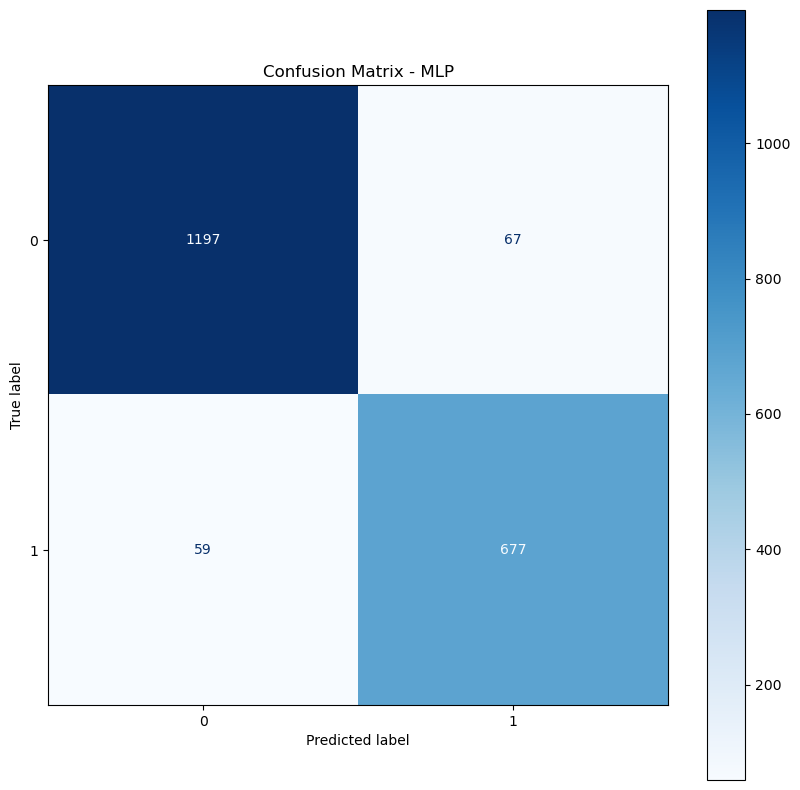

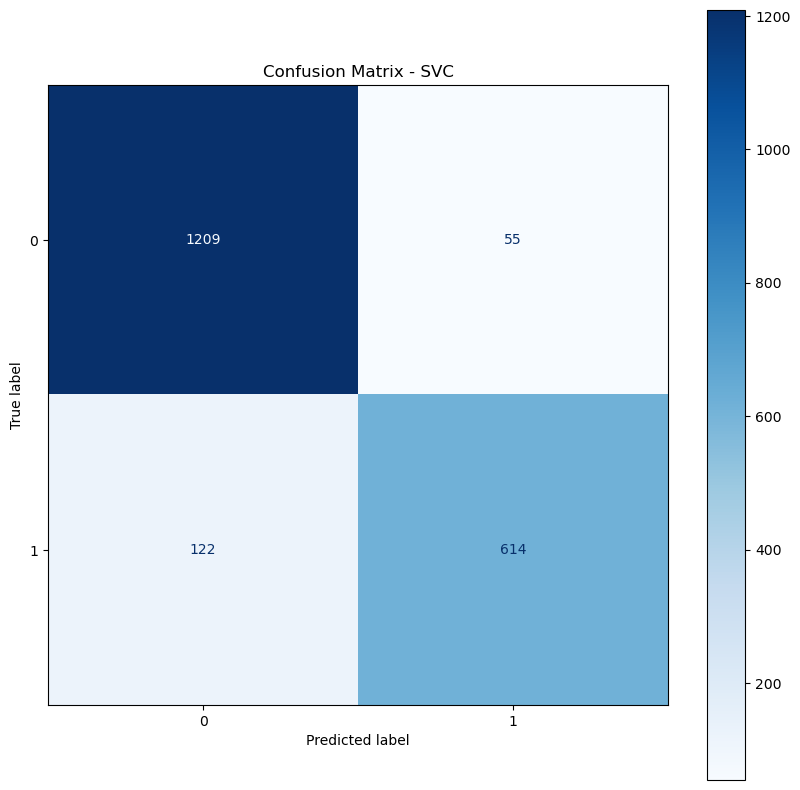

In [11]:
generate_confusion_matrix(mlp, X_test, y_test, "MLP")
generate_confusion_matrix(svc, X_test, y_test, "SVC")

In [30]:
mlp.score(X_test, y_test), svc.score(X_test, y_test)

(0.937, 0.9115)

In [35]:
for metric, scores in scores_mlp.items():
    print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")

accuracy: 0.9254 ± 0.0125
f1: 0.8914 ± 0.0227
precision: 0.8892 ± 0.0230
recall: 0.9105 ± 0.0254
r2: 0.6826 ± 0.0480


In [36]:
for metric, scores in scores_svc.items():
    print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")

accuracy: 0.9070 ± 0.0080
f1: 0.8661 ± 0.0119
precision: 0.9039 ± 0.0105
recall: 0.8315 ± 0.0146
r2: 0.5973 ± 0.0347
